In [186]:
from sklearn.linear_model import Perceptron
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import pandas as pd
%matplotlib inline

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000000244E1E80>,
      dtype=object)

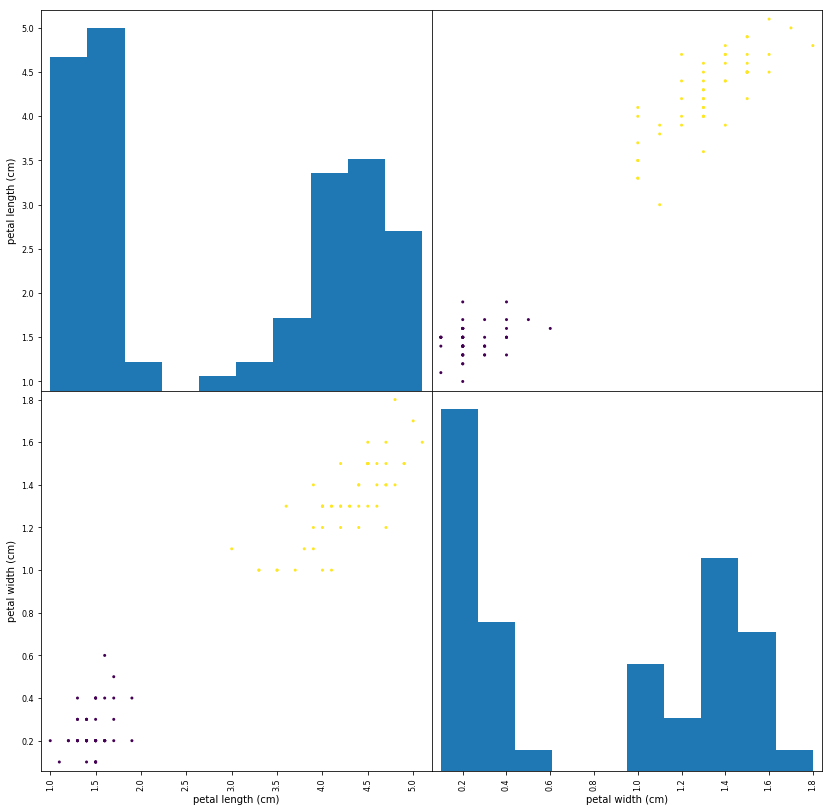

In [187]:
iris_df = pd.DataFrame(iris.data[:100,2:], columns=iris.feature_names[2:])
scatter_matrix(iris_df,alpha=1, figsize=(14,14), c= iris.target[:100])

In [169]:
X = iris.data[:100,2:]

In [170]:
y = iris.target[:100]

In [101]:
X_test, X_train, y_test, y_train = train_test_split(X, y)

In [108]:
score = []
for i in range(1, 1000):
    ppn = Perceptron(max_iter=i, penalty='l2')
    ppn.fit(X_train, y_train)
    score.append(ppn.score(X_test, y_test))

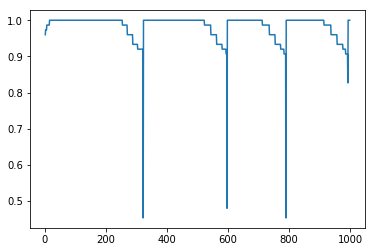

In [109]:
plt.plot(range(1,1000), score)

In [110]:
ppn = Perceptron(max_iter=30, penalty='l2')
ppn.fit(X_train, y_train)
ppn.score(X_test, y_test)

1.0

In [125]:
print(ppn.coef_)
w1 = ppn.coef_[0,0]
w2 = ppn.coef_[0,1]
print(w1)
print(w2)

[[1.20588525 1.48495004]]
1.2058852475373032
1.4849500366157378


In [126]:
print(ppn.intercept_)
T = ppn.intercept_[0]
print(T)

[-3.]
-3.0


In [131]:
def divideline(x):
    return -T/w2 - (w1/w2)*x

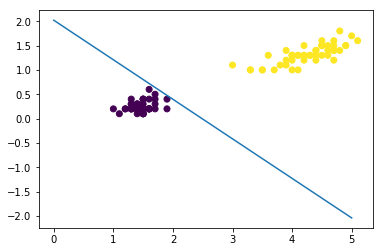

In [132]:
plt.scatter(X[:,0], X[:,1], c=iris.target[:100])
x = np.linspace(0,5)
plt.plot(x, divideline(x))

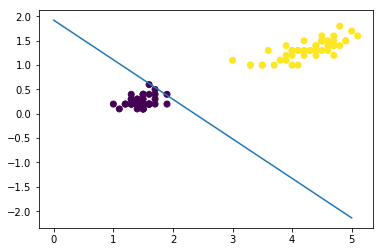

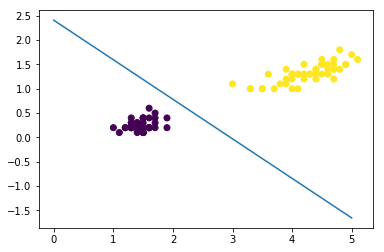

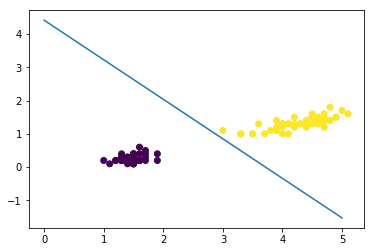

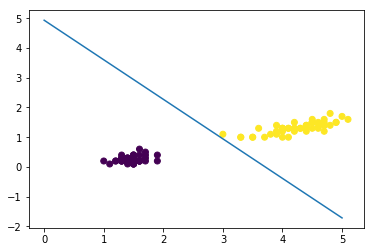

In [135]:
score = []
for i in [10, 100, 500, 700]:
    ppn = Perceptron(max_iter=i, penalty='l2')
    ppn.fit(X_train, y_train)
    w1 = ppn.coef_[0,0]
    w2 = ppn.coef_[0,1]
    T = ppn.intercept_[0]
    plt.scatter(X[:,0], X[:,1], c=iris.target[:100])
    x = np.linspace(0,5)
    plt.plot(x, divideline(x))
    plt.show()

In [136]:
from mpl_toolkits.mplot3d import Axes3D

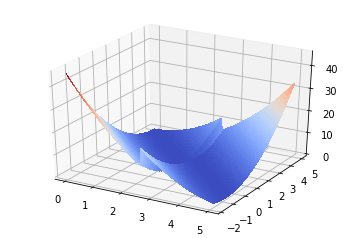

In [205]:
%matplotlib inline
from matplotlib import cm
fig = plt.figure()
ax = fig.gca(projection='3d')
x1 = X[:,0]
x2 = X[:,1]
x1 = np.linspace(0,5,100)
x2 = divideline(x1)
x1, x2 = np.meshgrid(x1, x2)
z = np.power(x1*w1 + x2*w2 + T - y, 2)
surf = ax.plot_surface(x1, x2, z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
plt.show()

In [207]:
from sklearn.svm import LinearSVC

In [208]:
lnsvc = LinearSVC()

In [213]:
lnsvc.fit(X_train, y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [214]:
lnsvc.score(X_test, y_test)

1.0

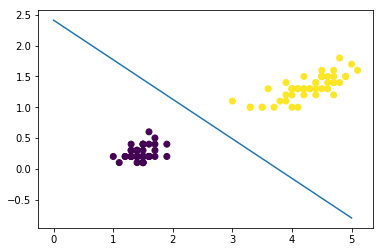

In [215]:
w1 = lnsvc.coef_[0,0]
w2 = lnsvc.coef_[0,1]
T = lnsvc.intercept_[0]
plt.scatter(X[:,0], X[:,1], c=iris.target[:100])
x = np.linspace(0,5)
plt.plot(x, divideline(x))